# Random Forest
In this notebook, we implemented and evaluated a Random Forest model to to predict **auto loan default** (bad_flag).

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from preprocessing import load_data, preprocess_data
from model_evaluation import evaluate_models, tune_hyperparameters, feature_importance, threshold_analysis, cross_val_pr_curve, cross_val_roc_curve

from sklearn.metrics import classification_report
import seaborn as sns

## Load & Preprocess Data

In [2]:
train_path = "/Users/heba/Desktop/Erdos/Training_data.csv"
eval_path = "/Users/heba/Desktop/Erdos/Testing_data.csv"

df_train, df_eval = load_data(train_path, eval_path)
X_train_processed, y_train, X_eval_processed, y_eval, to_drop_corr, cols_to_drop, preprocessor = preprocess_data(df_train, df_eval)

print("Train shape:", X_train_processed.shape)
print("Eval shape:", X_eval_processed.shape)

Train shape: (21348, 28)
Eval shape: (5336, 28)


### Random Forest

Best Params: {'class_weight': 'balanced_subsample', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
CV Scores: [0.15091864 0.19968304 0.13978495]
Mean CV Score: 0.16346220806546208
Classification Report:               precision    recall  f1-score   support

           0       0.97      0.91      0.94     20390
           1       0.16      0.36      0.22       958

    accuracy                           0.89     21348
   macro avg       0.56      0.64      0.58     21348
weighted avg       0.93      0.89      0.91     21348



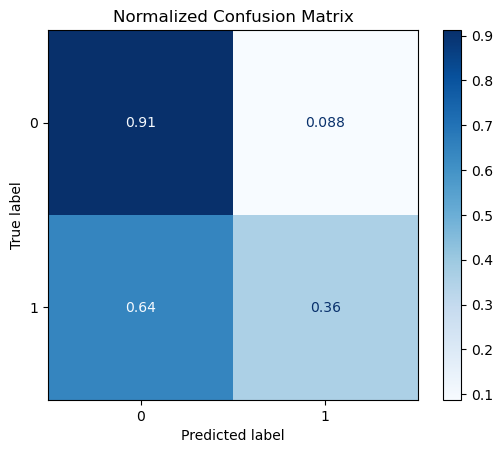

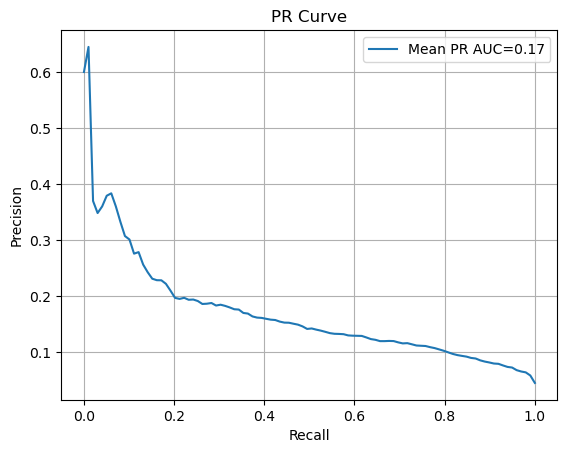

Mean PR AUC: 0.1676


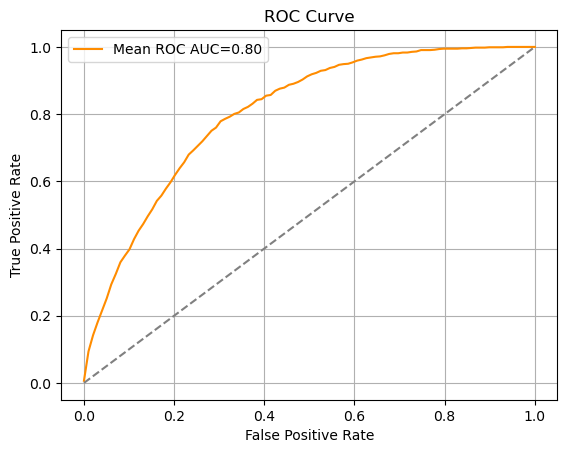

Mean ROC AUC: 0.8043


/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomFo

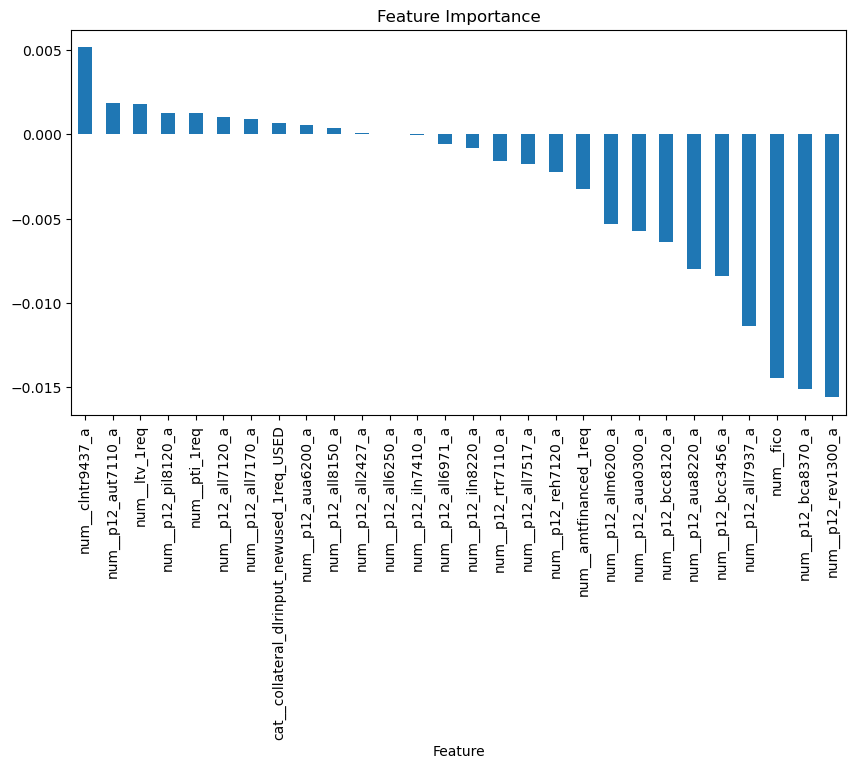

In [6]:
from sklearn.model_selection import GridSearchCV
# Convert to DataFrame with feature names
X_train_df = pd.DataFrame(X_train_processed, columns=preprocessor.get_feature_names_out())

# Define param grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Tune with GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, scoring='f1', cv=3, n_jobs=-1)
grid_rf.fit(X_train_df, y_train)

# Report best params
print("Best Params:", grid_rf.best_params_)

# Final model
rf_best = grid_rf.best_estimator_

# Evaluate
evaluate_models(rf_best, X_train_df, y_train)

# Feature importance
feature_importance(rf_best, X_train_df, y_train)

import warnings
warnings.filterwarnings("ignore", message="X has feature names, but")


CV Scores: [0.1281337  0.1253362  0.11454239]
Mean CV Score: 0.1226707663031033
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.77      0.86     20390
           1       0.12      0.70      0.21       958

    accuracy                           0.76     21348
   macro avg       0.55      0.73      0.53     21348
weighted avg       0.94      0.76      0.83     21348



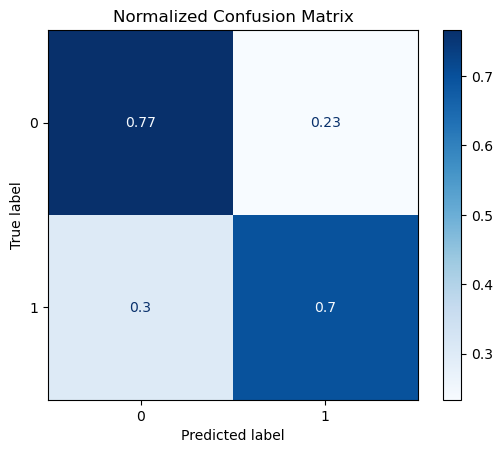

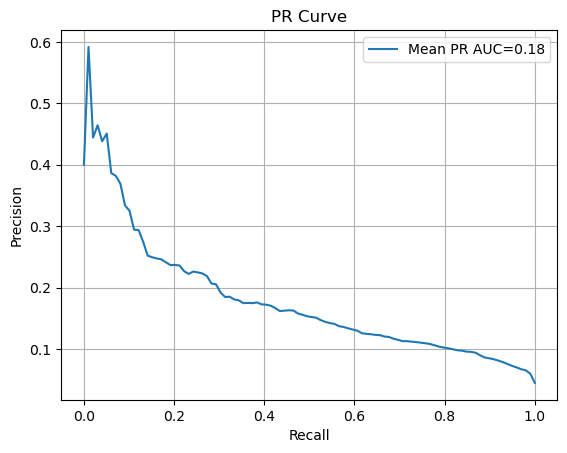

Mean PR AUC: 0.1779


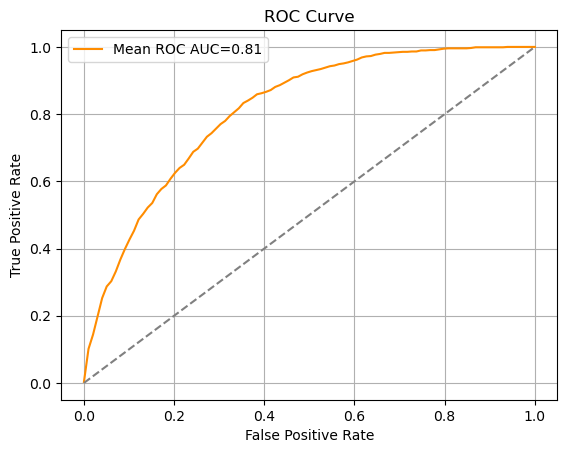

Mean ROC AUC: 0.8110


,precision,recall,f1-score,support
0,0.981713,0.766160,0.860645,20390.000000
1,0.122723,0.696242,0.208666,958.000000
accuracy,0.763022,0.763022,0.763022,0.763022
macro avg,0.552218,0.731201,0.534655,21348.000000
weighted avg,0.943166,0.763022,0.831387,21348.000000


In [19]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
brf.fit(X_train_df, y_train)
evaluate_models(brf, X_train_df, y_train)


In [20]:
y_proba_eval = brf.predict_proba(X_eval_processed)[:, 1]


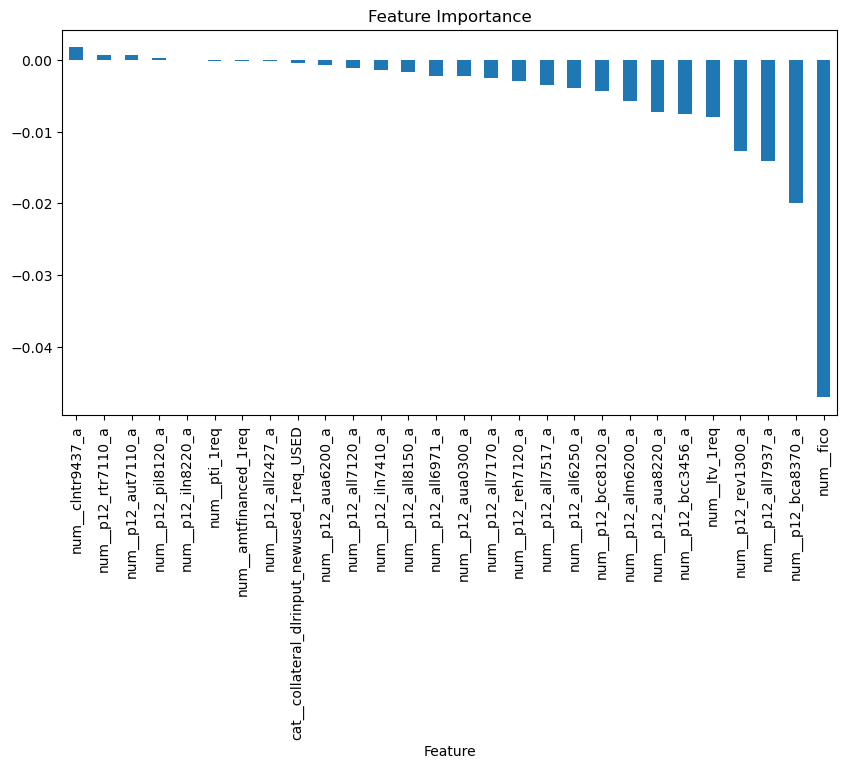

,Feature,Importance
26,num__clntr9437_a,1.798763e-03
17,num__p12_rtr7110_a,7.635376e-04
6,num__p12_aut7110_a,6.839048e-04
18,num__p12_pil8120_a,3.700581e-04
15,num__p12_iln8220_a,-2.220446e-17
2,num__pti_1req,-5.152708e-05
1,num__amtfinanced_1req,-6.089563e-05
23,num__p12_all2427_a,-1.405284e-04
27,cat__collateral_dlrinput_newused_1req_USED,-3.700581e-04
22,num__p12_aua6200_a,-6.792205e-04


In [21]:
feature_importance(brf, X_train_df, y_train)


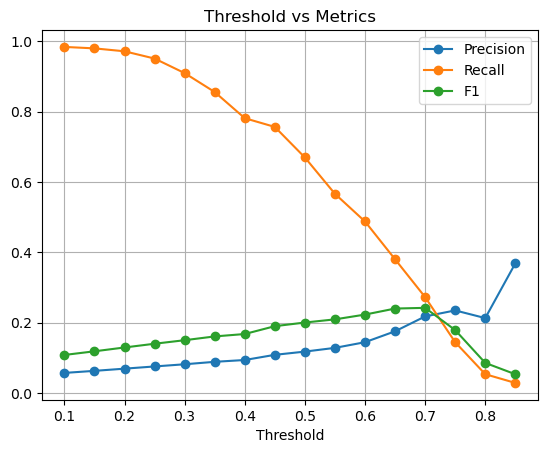

,Threshold,Precision,Recall,F1
0,0.10,0.057349,0.983471,0.108379
1,0.15,0.063200,0.979339,0.118737
2,0.20,0.069444,0.971074,0.129619
3,0.25,0.075708,0.950413,0.140244
4,0.30,0.081906,0.909091,0.150273
5,0.35,0.088879,0.855372,0.161027
6,0.40,0.094030,0.780992,0.167851
7,0.45,0.108734,0.756198,0.190130
8,0.50,0.117904,0.669421,0.200495
9,0.55,0.128518,0.566116,0.209480


In [22]:
from model_evaluation import threshold_analysis
threshold_analysis(y_eval, y_proba_eval)

In [23]:
from sklearn.metrics import classification_report

y_pred_eval = (y_proba_eval >= 0.35).astype(int)
print("=== Final Evaluation on Test Set ===")
print(classification_report(y_eval, y_pred_eval))


=== Final Evaluation on Test Set ===
              precision    recall  f1-score   support

           0       0.99      0.58      0.73      5094
           1       0.09      0.86      0.16       242

    accuracy                           0.60      5336
   macro avg       0.54      0.72      0.45      5336
weighted avg       0.95      0.60      0.71      5336



Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Params: {'class_weight': 'balanced', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
CV Scores: [0.11719867 0.11457848 0.10472479]
Mean CV Score: 0.1121673135398512
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.73      0.84     20390
           1       0.11      0.74      0.19       958

    accuracy                           0.73     21348
   macro avg       0.55      0.73      0.51     21348
weighted avg       0.94      0.73      0.81     21348



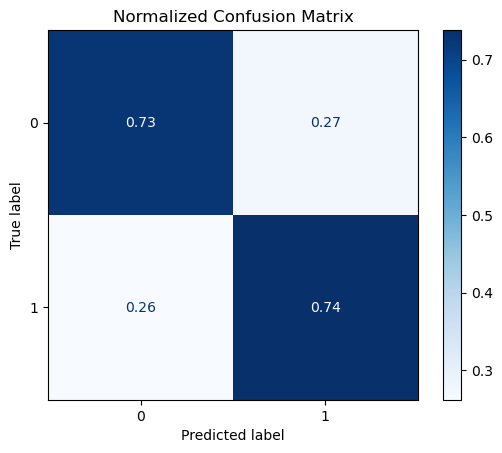

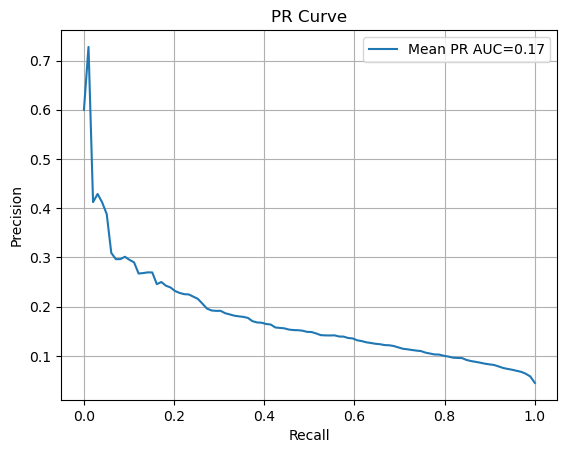

Mean PR AUC: 0.1733


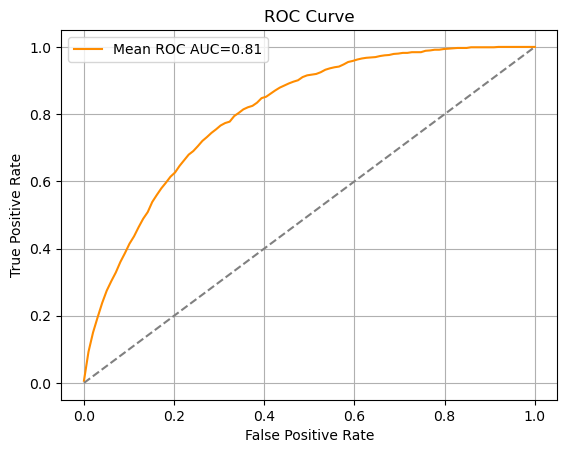

Mean ROC AUC: 0.8065


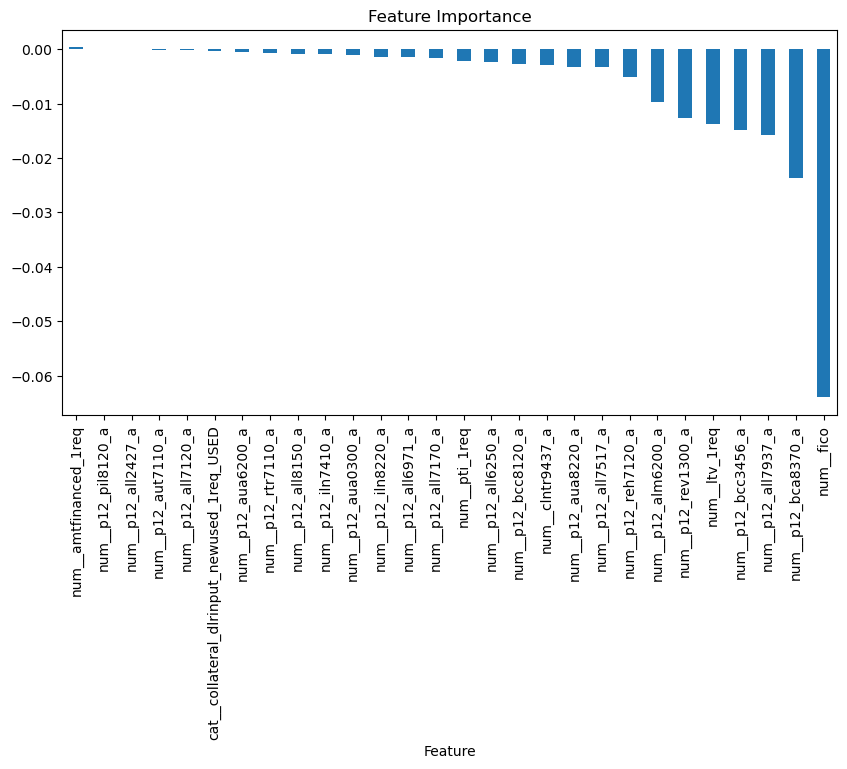

,Feature,Importance
1,num__amtfinanced_1req,0.000323
18,num__p12_pil8120_a,0.000061
23,num__p12_all2427_a,-0.000009
6,num__p12_aut7110_a,-0.000155
7,num__p12_all7120_a,-0.000225
27,cat__collateral_dlrinput_newused_1req_USED,-0.000393
22,num__p12_aua6200_a,-0.000590
17,num__p12_rtr7110_a,-0.000740
12,num__p12_all8150_a,-0.000815
10,num__p12_iln7410_a,-0.000885


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

#Convert X_train to DataFrame with feature names
X_train_df = pd.DataFrame(X_train_processed, columns=preprocessor.get_feature_names_out())

# Define param grid
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [5, 8, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

# Run GridSearchCV with 3-fold CV
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2)
grid_rf.fit(X_train_df, y_train)

# Report best params and retrain with them
print("Best Params:", grid_rf.best_params_)
rf_best = grid_rf.best_estimator_

# Evaluate on training set
evaluate_models(rf_best, X_train_df, y_train)

# Plot feature importance
feature_importance(rf_best, X_train_df, y_train)


=== Final Evaluation on Test Set ===
              precision    recall  f1-score   support

           0       0.98      0.72      0.83      5094
           1       0.11      0.69      0.18       242

    accuracy                           0.72      5336
   macro avg       0.54      0.71      0.51      5336
weighted avg       0.94      0.72      0.80      5336



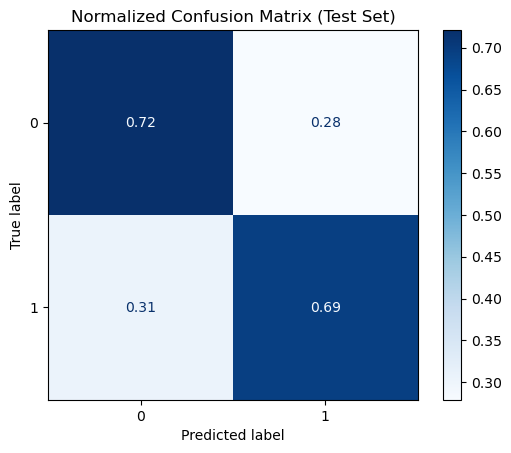

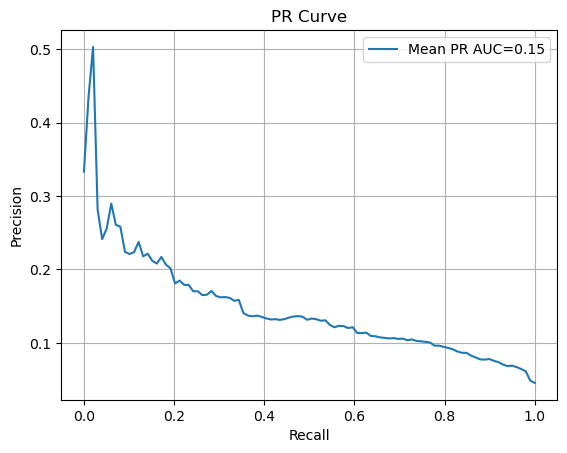

Mean PR AUC: 0.1464


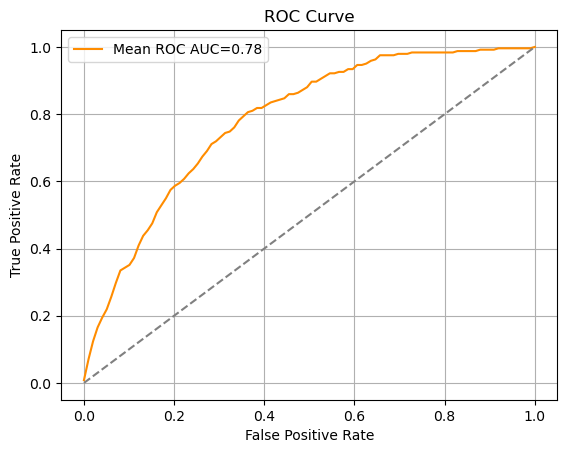

Mean ROC AUC: 0.7826


In [13]:
import matplotlib.pyplot as plt
X_test_df = pd.DataFrame(X_eval_processed, columns=preprocessor.get_feature_names_out())

#Make predictions
y_pred_test = rf_best.predict(X_test_df)
y_proba_test = rf_best.predict_proba(X_test_df)[:, 1]

#Classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("=== Final Evaluation on Test Set ===")
print(classification_report(y_eval, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_eval, y_pred_test, normalize='true', cmap='Blues')
plt.title("Normalized Confusion Matrix (Test Set)")
plt.grid(False)
plt.show()

#ROC and Precision-Recall curves
cross_val_pr_curve(rf_best, X_test_df, y_eval, cv=3)
cross_val_roc_curve(rf_best, X_test_df, y_eval, cv=3)

In [14]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from collections import defaultdict


df_eval_raw = pd.read_csv(eval_path)
sensitive_df = df_eval_raw[['Gender', 'Race']].reset_index(drop=True)


sensitive_df = sensitive_df.iloc[:len(y_pred_eval)].reset_index(drop=True)
y_eval = y_eval.reset_index(drop=True)

# Build prediction DataFrame
results_df = pd.DataFrame({
    'true': y_eval,
    'pred': y_pred_eval
}).reset_index(drop=True)
results_df = pd.concat([results_df, sensitive_df], axis=1)

# Filter out small or noisy groups
cleaned_results = results_df[(results_df['Race'] != 'Other') & (results_df['Gender'] != 'Undefined')].copy()

# === Gender Metrics ===
gender_metrics = compute_group_metrics(cleaned_results, 'Gender')
gender_eod = compute_eod(gender_metrics[0])
gender_di = compute_disparate_impact(gender_metrics[2])

print("\nGender Fairness (excluding 'Undefined'):")
print("TPR:", gender_metrics[0])
print("FPR:", gender_metrics[1])
print("Approval Rate:", gender_metrics[2])
print("EOD:", gender_eod)
print("DI:", gender_di)

#Race Metrics
race_metrics = compute_group_metrics(cleaned_results, 'Race')
race_eod = compute_eod(race_metrics[0])
race_di = compute_disparate_impact(race_metrics[2])

print("\nRace Fairness (excluding 'Other'):")
print("TPR:", race_metrics[0])
print("FPR:", race_metrics[1])
print("Approval Rate:", race_metrics[2])
print("EOD:", race_eod)
print("DI:", race_di)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/heba/Desktop/Erdos/Evaluation Dataset B_R-384891_Candidate Attach #2_PresSE_SRF #1142.csv'